In [ ]:
import numpy as np
import matplotlib.pyplot as plt # plotting and charts
import pandas as pd  # read CSV
import nltk  # tokenizer
from nltk.corpus import stopwords
import re   # stop words
# all imported libraries below are used in training the ML models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score

# Replace 'path/to/your/train.csv' with the actual path to your CSV file
data_path = '/content/train.csv'
df = pd.read_csv(data_path)

# ... (rest of your code remains the same)

In [ ]:
data = "/content/train.csv"
# if replacting on local machine, comment out above line an replace with below line
# data = "Your_local_path_of_dataset_here"

df = pd.read_csv(data)

# extract labels from CSV file, annotate to suit our project needs
text = list(df['tweet'])
labels = list(df['class'])

print(f"Total data inputs: {df.shape[0]}")

Total data inputs: 24783


In [ ]:

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_userHandles(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "", raw_text)
    return text
def remove_rt(raw_text):
    regex = r"RT"
    text = re.sub(regex, "", raw_text)
    return text

#remove URLS
def remove_urls(raw_text):
    urls_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(urls_regex, "", raw_text)
    return text

#remove unnecessary punctuation
def remove_punctuation(raw_text):
    # text = raw_text.replace(""", '')
    text = raw_text.replace("'", '')
    text = text.replace(".", '')
    text = text.replace(",", '')
    text = text.replace("!", '')
    text = text.replace(".", '')
    text = text.replace("?", '')
    text = text.replace("..", '')
    text = text.replace("...", '')

    return text

 # remove html/unicode entities
def remove_html(raw_text):
        html_regex = r"&[^\s;]+;"
        text = re.sub(html_regex, "", raw_text)
        return text

# removing stopwords
def remove_stopwords(raw_text):
    tokenized_text = nltk.word_tokenize(raw_text)
    text = [word for word in tokenized_text if not word.lower in stop_words]
    text = " ".join(text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt # plotting and charts
import pandas as pd  # read CSV
import nltk  # tokenizer
from nltk.corpus import stopwords
import re   # stop words
# all imported libraries below are used in training the ML models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score

import os # importing dataset from kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import nltk
nltk.download('punkt_tab') # Download the punkt_tab data package

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score

import nltk
nltk.download('punkt_tab')

cleaned_text = []
for raw_text in text:
    text_cleaned = remove_userHandles(raw_text)
    text_cleaned = remove_rt(text_cleaned)
    text_cleaned = remove_urls(text_cleaned)
    text_cleaned = remove_punctuation(text_cleaned)
    text_cleaned = remove_html(text_cleaned)
    text_cleaned = remove_stopwords(text_cleaned)
    cleaned_text.append(text_cleaned)

x_train, x_test, y_train, y_test = train_test_split(cleaned_text, labels, test_size=0.2, random_state=42)

# tokenizing declaration
tokenizer = Tokenizer()

#build vocab of based on dataset
tokenizer.fit_on_texts(x_train)

#tokenize data sets
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

# Maximum length of a sequence
max_length = 100  # reduced for memory allocation

# Padding the sequences
x_train = pad_sequences(x_train, padding='post', maxlen=max_length)
x_test = pad_sequences(x_test, padding='post', maxlen=max_length)

y_train = np.array(y_train)
y_test = np.array(y_test)


vocab_size = len(tokenizer.word_index) + 1

print(f"Number of text inputs in training set: {x_train.shape[0]}")
print(f"Number of text inputs in testing set: {x_test.shape[0]}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Number of text inputs in training set: 19826
Number of text inputs in testing set: 4957


In [ ]:
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=100)) # embeds features
cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))  # first convolution layer
cnn_model.add(BatchNormalization()) # enhances performance in CNN models
cnn_model.add(MaxPooling1D(pool_size=2)) # reduces dimensionality on individual layers
cnn_model.add(GlobalMaxPooling1D()) # reduces dimensionality on all layers
cnn_model.add(Dense(10, activation='relu'))  # fully connects layers
cnn_model.add(Dropout(0.5)) # prevents overfitting in CNN models
cnn_model.add(Dense(1, activation='sigmoid')) # output layer

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# Training the CNN model
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, verbose=True, validation_data=(x_test, y_test), batch_size=32)
cnn_model.summary()

Epoch 1/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 31s 46ms/step - accuracy: 0.7435 - loss: -38.8514 - val_accuracy: 0.7730 - val_loss: -745.4126
Epoch 2/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.7745 - loss: -1566.7981 - val_accuracy: 0.7730 - val_loss: -5311.7773
Epoch 3/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.7740 - loss: -8527.8525 - val_accuracy: 0.7730 - val_loss: -18113.6836
Epoch 4/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7752 - loss: -28548.1504 - val_accuracy: 0.7730 - val_loss: -39561.7422
Epoch 5/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.7717 - loss: -60096.7617 - val_accuracy: 0.7730 - val_loss: -67183.6562
Epoch 6/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.7753 - loss: -101955.2188 - val_accuracy: 0.7730 - val_loss: -103371.5938
Epoch 7/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.7808 - loss: -161191.1250 - val_accuracy: 0.7730 - val_loss: -145006.7031
Epoch 8/10
620/620 ━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,911,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 64)         │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,833,489 (22.25 MB)

 Trainable params: 1,944,453 (7.42 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 3,888,908 (14.84 MB)

In [ ]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test, y_test, verbose=False)

print(f"CNN Model - Loss: {cnn_loss}, Accuracy: ({cnn_accuracy * 100} %")

CNN Model - Loss: -339515.21875, Accuracy: (77.30482220649719 %


Accurracy


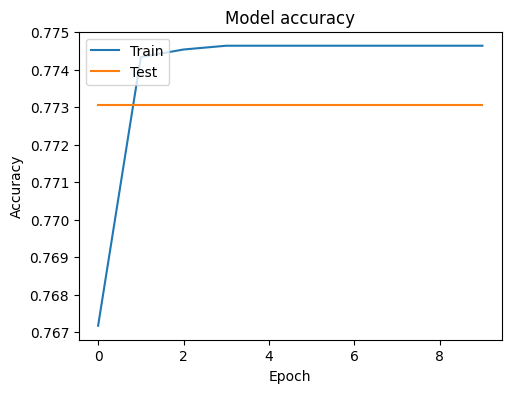

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

LOSS VALUES

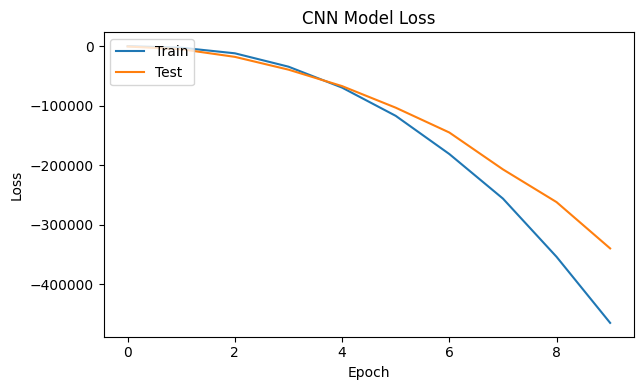

CNN Model Loss: -339515.21875


In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

print(f"CNN Model Loss: {cnn_loss}")

PERFORMANCE


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


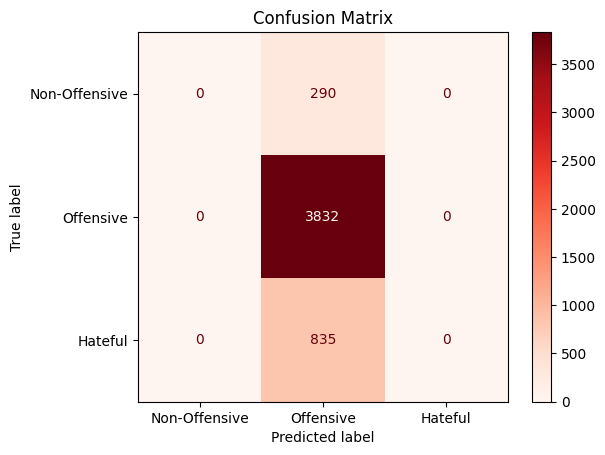

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the labels for the test set
y_pred = (cnn_model.predict(x_test) > 0.5).astype("int32")

# Generate matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Non-Offensive', 'Offensive', 'Hateful'])

# Plot the confusion matrix
cmd.plot(cmap=plt.cm.Reds)

plt.title('Confusion Matrix')
plt.show()